## OSNOVNA VIZUALIZACIJA PODATKOV

V osnovni vizualizaciji so prikazani podatki za lažjo razumevanje strukture podatkov ter za osnovno analizo.

### PRIKAZ ZVEZNIH DRŽAV NA MAPI, GLEDE NA KATEGORIJO LEGALIZACIJO
Kategorija legalizacije:
- **V celoti legalizirane**: To so zvezne države, kjer je uporaba, posedovanje in prodaja konoplje povsem legalna pod določenimi pogoji. 
- **Rekreacijsko legalizirane**: V teh zveznih državah je uporaba konoplje legalna za rekreacijske namene, kar pomeni, da ljudje lahko zakonito uživajo te substance brez medicinskega ali terapevtskega razloga. 
- **Medicinsko legalizirane**: Zvezne države v tej kategoriji dovoljujejo uporabo konoplje izključno za medicinske in terapevtske namene pod nadzorom zdravstvenih strokovnjakov.
- **Ni legalizirana**: V teh zveznih državah so določene substance popolnoma prepovedane in so kaznovane z zakonodajo, ki se razlikuje od zvezne države do zvezne države.
e. 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
legalization_excel = r"C:\Users\Uporabnik\PR24-MVC\podatki\legalization.csv"

df = pd.read_csv(legalization_excel)

legalization_dict = {
    "legalizirana": [],
    "legalizirana_rec": [],
    "legalizirana_med": [],
    "ni_legalizirana": []
}


for index, row in df.iterrows():
    state = row['State']
    code = row['Code']
    rec = row['Recreational']
    med = row['Medical']
    
    # Determine the category and append the row to the corresponding list
    if rec == "Yes" and med == "Yes":
        legalization_dict["legalizirana"].append([state, code, rec, med])
    elif rec == "Yes" and med != "Yes":
        legalization_dict["legalizirana_rec"].append([state, code, rec, med])
    elif rec != "Yes" and med == "Yes":
        legalization_dict["legalizirana_med"].append([state, code, rec, med])
    else:
        legalization_dict["ni_legalizirana"].append([state, code, rec, med])
        
#for category, rows in legalization_dict.items():
 #   print(category + ":")
  #  for row in rows:
   #     print(row)
    #print()


Število držav z legalizirano rekreativno konopljo: 0
Število držav z legalizirano medicinsko konopljo: 16
Število držav v celoti legalizirano konopljo: 24
Število držav, ki nima legalizirane konoplje: 10


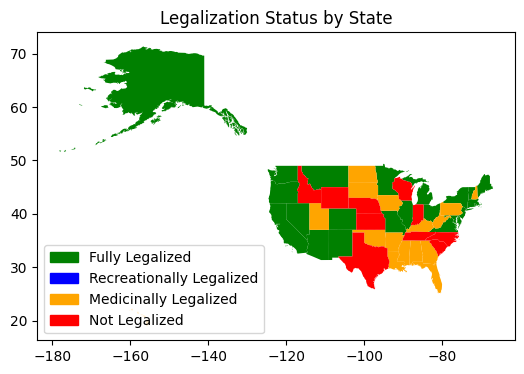

In [3]:
# shapefile containing the geometry of the US states
us_map = gpd.read_file(r"C:\Users\Uporabnik\Downloads\States_shapefile-shp\States_shapefile.shp")
colors = {'legalizirana': 'green', 'legalizirana_rec': 'blue', 'legalizirana_med': 'orange', 'ni_legalizirana': 'red'}

#print(us_map.columns)
# Mapa
fig, ax = plt.subplots(figsize=(30, 4))

print("Število držav z legalizirano rekreativno konopljo:", len(legalization_dict["legalizirana_rec"]))
print("Število držav z legalizirano medicinsko konopljo:", len(legalization_dict["legalizirana_med"]))
print("Število držav v celoti legalizirano konopljo:", len(legalization_dict["legalizirana"]))
print("Število držav, ki nima legalizirane konoplje:", len(legalization_dict["ni_legalizirana"]))

# PlotTING each category with a different color
for category, state_list in legalization_dict.items():
    for state_info in state_list:
        state_name = state_info[0].upper()   # Get state name from the state_info list
        if state_name not in us_map['State_Name'].values:
            print(f"{state_name} not found in the map")
            print(us_map['State_Name'])
        else:
            us_map[us_map['State_Name'] == state_name].plot(ax=ax, color=colors[category])

# legend
legend_labels = {'legalizirana': 'Fully Legalized', 'legalizirana_rec': 'Recreationally Legalized', 
                 'legalizirana_med': 'Medicinally Legalized', 'ni_legalizirana': 'Not Legalized'}
handles = [plt.Rectangle((0,0),1,1, color=colors[category]) for category in legalization_dict.keys()]
ax.legend(handles, legend_labels.values(), loc='lower left')

# Set plot title
ax.set_title('Legalization Status by State')

# Show the map
plt.show()








### PRIKAZ ŠTEVILA BREZDOMCEV GLEDE NA LETO IN KATEGORIJO LEGALIZACIJE

 uporabo IP-widgets lahko izberemo med različnimi leti, ki so na voljo glede na podatke. Graf prikazuje število brezdomcev za posamezno zvezno državo. Stolpci so pobarvani glede na kategorijo legalizacije. Ugotovili smo, da je skupno največ brezdomcev tam, kjer je legalizacija substanc v celoti dovoljena, medtem ko je v državah z drugačno politiko manj brezdomcev. Največji delež sledi medicinsko legaliziranim državam, nato tistim, kjer uporaba substanc ni legalna. Nobena država pa nima samo rekreacijsko legalizirane politike.

In [4]:
excel_file_homelessness = r"C:\Users\Uporabnik\PR24-MVC\podatki\homelessness.csv"

df_homeless = pd.read_csv(excel_file_homelessness)

# UREJANJE
dict_homeless = {}

for index_homeless, row_homeless in df_homeless.iterrows():
    year = row_homeless["Year"]
    state_code_homeless = row_homeless["State"]
    overall = row_homeless["Overall Homeless"]
    
    # Preverimo, ali je leto že v slovarju
    if year not in dict_homeless:
        dict_homeless[year] = []
    
    # Dodamo podatke za vsako kategorijo iz legalization_dict, ki ustreza državi
    for k, v in legalization_dict.items():
        for element in v:
            state_name = element[0]
            state_code = element[1]
            if state_code == state_code_homeless:
                dict_homeless[year].append([state_name, overall, k])
            
#for year, data_list in dict_homeless.items():
 #   print(f"Year: {year}")
 #   for data in data_list:
     #   print(data)

In [6]:
# RISANJE GRAFA
def plot_graph(year):
    data = dict_homeless[year]
    state_names = [item[0] for item in data]
    overall_homeless = [item[1] for item in data]
    categories = [item[2] for item in data]

    # Seznam edinstvenih kategorij
    unique_categories = list(set(categories))

    plt.figure(figsize=(10, 10))

    # Razdeli podatke glede na kategorije in nato nariši stolpce
    for category in unique_categories:
        indices = [i for i, x in enumerate(categories) if x == category]
        plt.barh([state_names[i] for i in indices], [overall_homeless[i] for i in indices], label=category)
    overall_counts_year = {
        "legalizirana": 0,
        "legalizirana_rec": 0,
        "legalizirana_med": 0,
        "ni_legalizirana": 0
    }
    for item in data:
        category = item[2]
        overall = item[1]
        overall_counts_year[category] += overall

    # Izpis skupnega števila brezdomcev za izbrano leto
    print(f"Overall homeless counts for year {year}:")
    for category, count in overall_counts_year.items():
        print(f"{category}: {count}")
    plt.xlabel('Overall Homeless')
    plt.ylabel('State')
    plt.title(f'Overall Homeless by State ({year})')
    plt.legend()
    plt.show()


# Ustvari interaktivni padajoči meni
interact(plot_graph, year=widgets.Dropdown(options=dict_homeless.keys(), description='Year:'))


interactive(children=(Dropdown(description='Year:', options=(2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2…